Менеджер банка беспокоится о том, что все больше и больше клиентов оставляют свои услуги по обслуживанию кредитных карт. Они были бы очень признательны, если бы можно было предсказать для них, кто будет отброшен, чтобы они могли инициативно пойти к клиенту, чтобы предоставить им лучшие услуги и обратить решения клиентов в противоположную сторону.
Источник данных https://leaps.analyttica.com/home
Признаки данных:

churn - ушедший (Attrited) или текущий (Existing) клиент

Customer_Age - Демографическая переменная-возраст клиента в годах

Gender - Демографические переменные - M=мужской, F=женский

Dependent_count - Демографическая переменная-число иждивенцев

Education_Level - Демографическая переменная - образовательная квалификация владельца счета (пример: средняя школа, выпускник колледжа и т. д.)

Marital_Status - Демографическая переменная-женат, холост, разведен, неизвестен

Income_Category - Демографическая переменная - категория годового дохода владельца счета (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, неизвестно)

Card_Category - Переменная продукта-Тип карты (Синяя, серебряная, золотая, Платиновая)

Months_on_book - Период взаимоотношений с банком

Total_Relationship_Count - Общее количество продуктов, находящихся у клиента

Months_Inactive_12_mon - Количество месяцев бездействия за последние 12 месяцев

Contacts_Count_12_mon - Количество контактов за последние 12 месяцев

Credit_Limit - Кредитный лимит по кредитной карте

Total_Revolving_Bal - Общий оборотный остаток на кредитной карте

Avg_Open_To_Buy - Открытая для покупки кредитная линия (в среднем за последние 12 месяцев)

Total_Amt_Chng_Q4_Q1 - Изменение суммы сделки (4 квартал по сравнению с 1 кварталом)

Total_Trans_Amt - Общая сумма сделки (за последние 12 месяцев)

Total_Trans_Ct - Общее количество транзакций (за последние 12 месяцев)

Total_Ct_Chng_Q4_Q1 - Изменение количества транзакций (Q4 по сравнению с Q1)

Avg_Utilization_Ratio - Средний Коэффициент Использования Карт

Ваша задача: предсказать клиентов, которые намереваются уйти (churn). Необходимо продемонстрировать этапы подготовки данных:

Загрузка
Корректность загрузки

Проверка на дубликаты

Проверка на пропуски

Проверка на аномалии

Группировки данных по категориям в зависимости от целевой переменной (выводы о данных, например, отток по типу карты)

Визуализации: гистограммы, тепловые карты, pairplot-ы, violin

Кодирование данных (через one-hot и через уникальное значение)

Разеделение на train и test

Обучение и перебор любых гиперпараметров

# Вводим библиотеку

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

## Проверяем вывод csv(подключен он или нет)

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Конец таблицы


In [3]:
df.tail()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


###  Выводим информацию о датафрейме


In [4]:
df.info()

# Видно, что в столбце non-null у нас количество строк одинаковое, что означает, что у нас нет пустых мест, а так же что дубликатов нет, но я на всякий случай убедился

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### Выводим статическую сводку

In [5]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Проверка на дубликаты(дублей нет)

In [6]:
#Найдём дупликаты
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")



Количество дубликатов: 0


## Посмотрим по хитмапу количество пробелов и убедимся, что их нет второй раз

<Axes: >

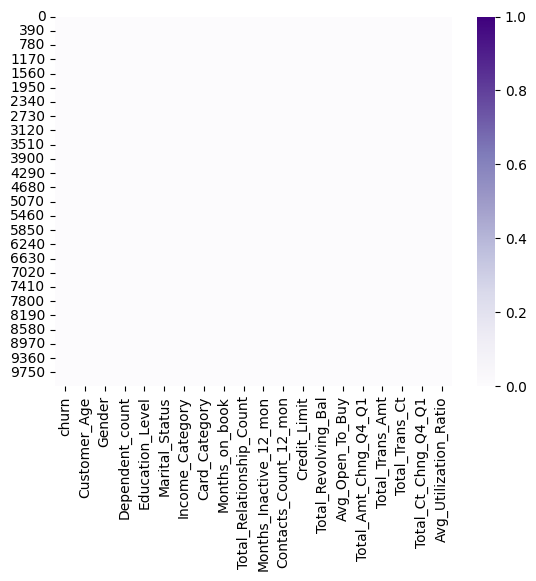

In [7]:
sns.heatmap(df.isnull(), cmap='Purples', vmin=0, vmax = 1)

In [8]:
df_select_out = df[df.columns[11:]]
outlier_cols = []

for column in df_select_out.columns:
    Q1 = df_select_out[column].quantile(0.25)
    Q3 = df_select_out[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_select_out[column] < Q1 - 1.5 * IQR) | (df_select_out[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


## визуализация выбросов при помощи плотов

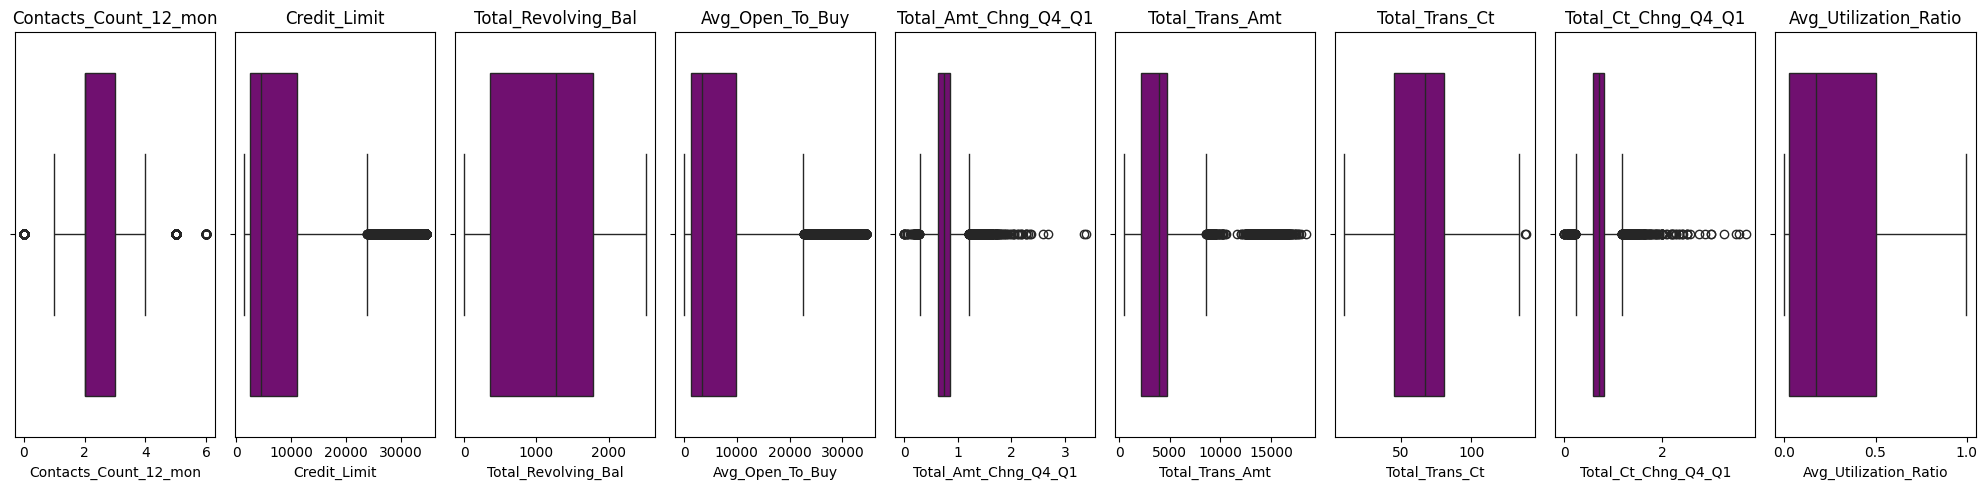

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_select_out.columns), figsize=(20, 5))

for i, column in enumerate(df_select_out.columns):
    sns.boxplot(x=df_select_out[column], ax=axes[i], color='purple')
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

### Мы можем сказать что большее количество выбросов смещена влево

# Удаление выбросов

Для удаления выбросов из набора данных мы будем использовать метод межквартильного размаха (IQR). 

## Шаги:

1. **Вычисление первого (Q1) и третьего (Q3) квартилей:**
   - ( Q1 = text{quantile}(X, 0.25) )
   - ( Q3 = text{quantile}(X, 0.75) )

2. **Вычисление межквартильного размаха (IQR):**
   [
   IQR = Q3 - Q1
   ]

3. **Определение границ для выбросов:**
   - Нижняя граница:
   [
   text{lower_bound} = Q1 - 1.5 times IQR
   ]
   - Верхняя граница:
   [
   text{upper_bound} = Q3 + 1.5 times IQR
   ]

4. **Фильтрация данных для удаления выбросов:**
   - Отфильтрованные данные:
   [
   Y = {x in X : x geq text{lower_bound} land x leq text{upper_bound}}
   ]

Таким образом, весь процесс можно записать в виде формулы:

[
Y = {x_i in X : Q1 - 1.5 times (Q3 - Q1) leq x_i leq Q3 + 1.5 times (Q3 - Q1)}
]

где ( X ) — это исходный набор данных по столбцу, а ( Y ) — это набор данных после удаления выбросов.



In [10]:
def delete(frame, column):
    Q1 = frame[column].quantile(0.25)
    Q3 = frame[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return frame[(frame[column] >= lower_bound) & (frame[column] <= upper_bound)]

for col in outlier_cols:
    df = delete(df, col)
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10048,Attrited Customer,48,M,4,College,Married,$80K - $120K,Blue,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10054,Attrited Customer,33,F,1,Doctorate,Single,Less than $40K,Blue,15,1,1,3,3709.0,1180,2529.0,0.645,8130,74,0.897,0.318
10067,Attrited Customer,49,F,4,Uneducated,Married,$40K - $60K,Blue,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
10089,Attrited Customer,52,F,5,Unknown,Married,Less than $40K,Blue,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


## Распределение income categroy дохода в зависимости от Customer Age

C:\Users\rsbro\AppData\Local\Temp\ipykernel_11496\279354042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_select_out, x=df['Income_Category'], y=df['Customer_Age'], palette='tab10')


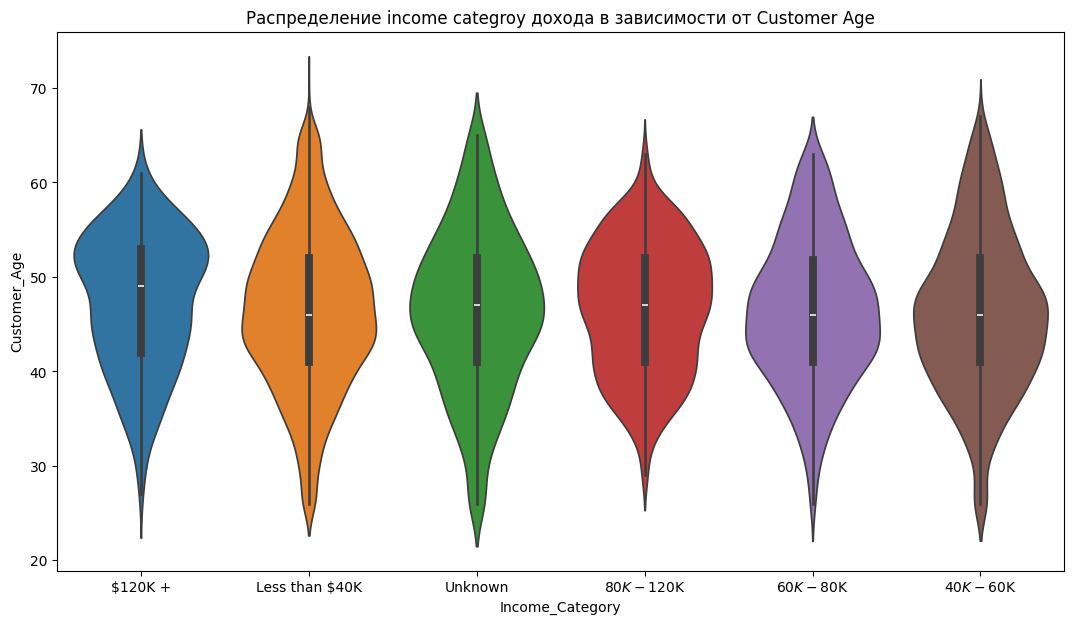

In [11]:
plt.figure(figsize=(13, 7))
sns.violinplot(df_select_out, x=df['Income_Category'], y=df['Customer_Age'], palette='tab10')
plt.xlabel('Income_Category')
plt.ylabel('Customer_Age')
plt.title('Распределение income categroy дохода в зависимости от Customer Age')
plt.show()

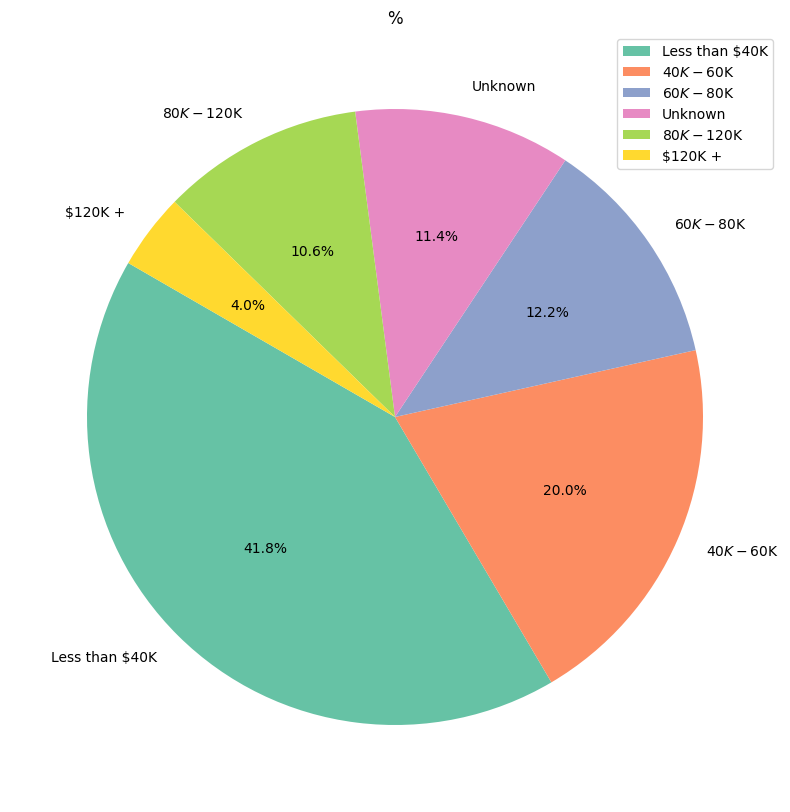

In [12]:
income_types = df['Income_Category'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(income_types, labels=income_types.index, autopct='%1.1f%%', startangle=150, colors=plt.cm.Set2.colors)

plt.legend()
plt.title('%')
plt.show()

In [13]:
categorial_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(df[categorial_columns])
df[categorial_columns] = encoded_data.astype(int)
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,0,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,1,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10048,0,48,1,4,0,1,3,0,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10054,0,33,0,1,1,2,4,0,15,1,1,3,3709.0,1180,2529.0,0.645,8130,74,0.897,0.318
10067,0,49,0,4,5,1,1,0,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
10089,0,52,0,5,6,1,4,0,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


<Axes: >

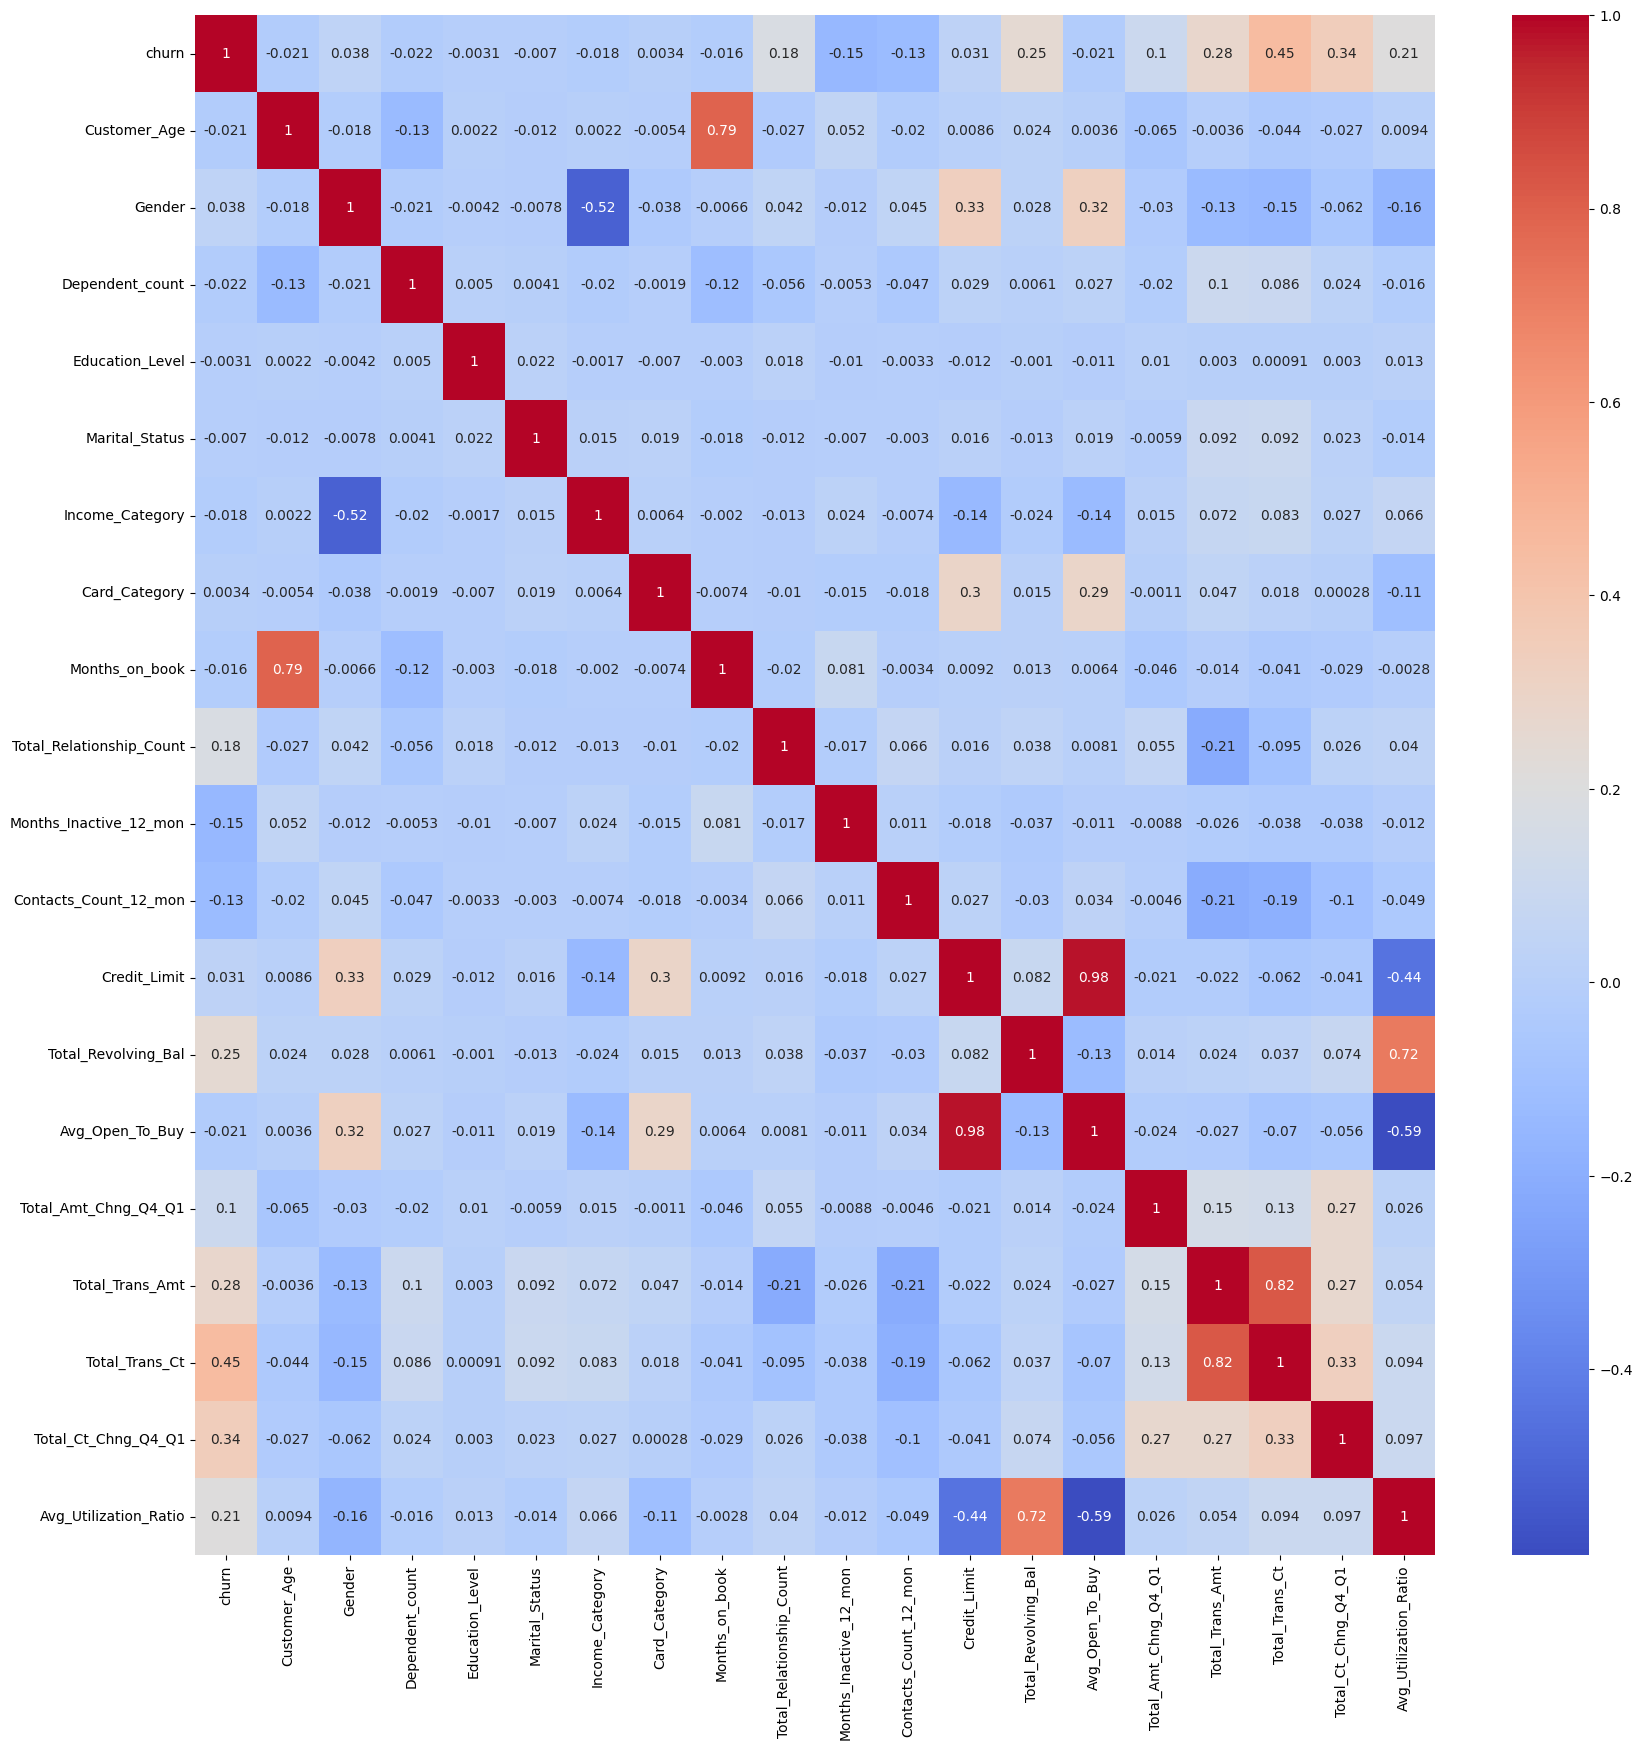

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,  cmap='coolwarm')

In [15]:
df.to_csv("churn_test.csv", index = False)